✅ Dataset Loaded Successfully!
Shape: (10, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  15                      81
2           3  Female   20                  16                       6
3           4    Male   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+

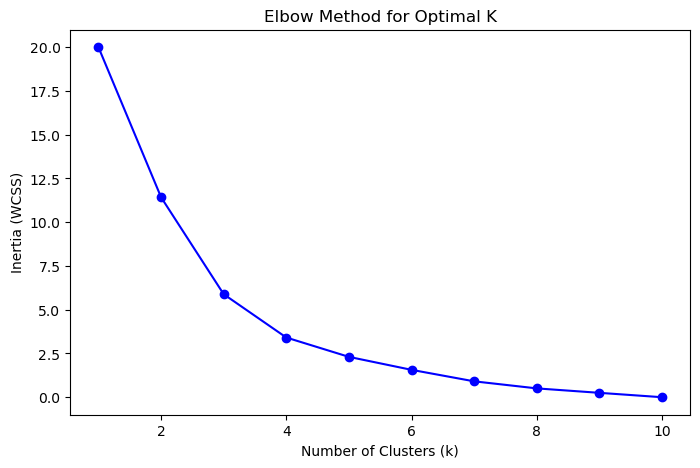


Cluster Labels Added to Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2  Female   21                  15                      81   
2           3  Female   20                  16                       6   
3           4    Male   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        1  
2        4  
3        1  
4        0  


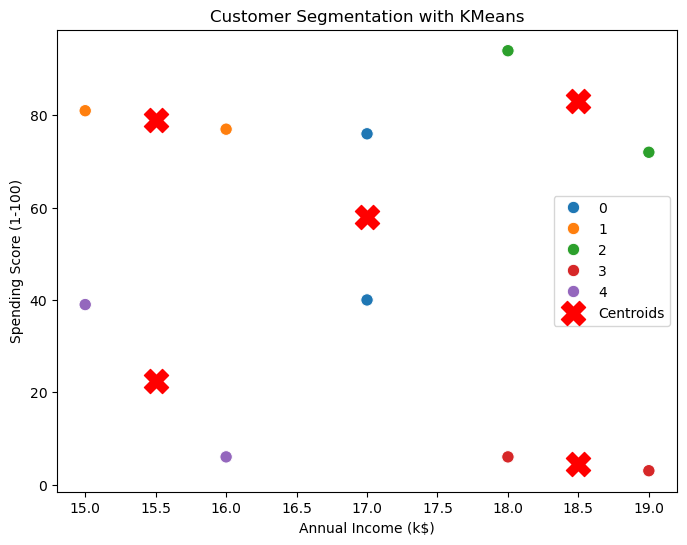

✅ Clustered dataset saved successfully at Downloads folder!


In [6]:
# -----------------------------------
# ✅ Task 2: Customer Segmentation using KMeans
# -----------------------------------

# Fix MKL warning for KMeans in Windows
import os
os.environ["OMP_NUM_THREADS"] = "1"


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 📌 Load Dataset
# ----------------------------
df = pd.read_csv(r"C:\Users\preethi\Downloads\Mall_Customers.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

# ----------------------------
# 📌 Basic Info
# ----------------------------
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# ----------------------------
# 📌 Select Features for Clustering
# ----------------------------
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features (good practice for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 📌 Elbow Method to find optimal K
# ----------------------------
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# ----------------------------
# 📌 Train Final KMeans Model (let’s pick k=5)
# ----------------------------
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster Labels Added to Dataset:")
print(df.head())

# ----------------------------
# 📌 Visualization of Clusters
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", 
                hue="Cluster", data=df, palette="tab10", s=80)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,0], 
            scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
            s=300, c="red", marker="X", label="Centroids")
plt.title("Customer Segmentation with KMeans")
plt.legend()
plt.show()

# ----------------------------
# 📌 Save clustered dataset
# ----------------------------
df.to_csv(r"C:\Users\preethi\Downloads\Mall_Customers_Clustered.csv", index=False)
print("✅ Clustered dataset saved successfully at Downloads folder!")
